In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve,RocCurveDisplay, roc_curve,confusion_matrix,log_loss,ConfusionMatrixDisplay,classification_report

In [48]:
data = pd.read_csv("database.csv")

In [49]:
data['Cod.Car.Sec'] = data['Cod.Car.Sec'].astype(str)

In [50]:
data

,Idalumno,Cod.Car.Sec,Anho,Ciclo,1P,Abandono,Recursante,Cant_Carreras,Cant_Materias,Regular,DiferenciaSemestres,Firma
0,12,CIV-PLS13,2018,2,3,0,0,4,6,0,3,0
1,23,ELE-PLS13,2016,1,11,0,0,1,6,0,2,1
2,46,ELE-PLS09,2016,1,9,0,0,1,5,0,6,0
3,49,CIV-PLS13,2017,1,21,0,0,1,2,1,0,1
4,50,MEC-PLS09,2016,1,5,0,1,2,5,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3635,4469,CIV-PLS13,2018,1,11,0,1,1,3,0,2,1
3636,4469,IND-PLS13,2018,2,10,0,1,2,3,0,1,1
3637,4469,IND-PLS09,2017,1,10,0,1,3,8,0,2,1
3638,4470,IND-PLS13,2022,2,8,0,0,1,4,0,1,0


In [51]:
carreras_cod = pd.get_dummies(data,columns=['Cod.Car.Sec'],prefix='carrera')

In [52]:
carreras_cod

,Idalumno,Anho,Ciclo,1P,Abandono,Recursante,Cant_Carreras,Cant_Materias,Regular,DiferenciaSemestres,Firma,carrera_CIV-PLS09,carrera_CIV-PLS13,carrera_ELE-PLS09,carrera_ELE-PLS13,carrera_IND-PLS09,carrera_IND-PLS13,carrera_MEC-PLS09,carrera_MEC-PLS13
0,12,2018,2,3,0,0,4,6,0,3,0,0,1,0,0,0,0,0,0
1,23,2016,1,11,0,0,1,6,0,2,1,0,0,0,1,0,0,0,0
2,46,2016,1,9,0,0,1,5,0,6,0,0,0,1,0,0,0,0,0
3,49,2017,1,21,0,0,1,2,1,0,1,0,1,0,0,0,0,0,0
4,50,2016,1,5,0,1,2,5,0,4,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,4469,2018,1,11,0,1,1,3,0,2,1,0,1,0,0,0,0,0,0
3636,4469,2018,2,10,0,1,2,3,0,1,1,0,0,0,0,0,1,0,0
3637,4469,2017,1,10,0,1,3,8,0,2,1,0,0,0,0,1,0,0,0
3638,4470,2022,2,8,0,0,1,4,0,1,0,0,0,0,0,0,1,0,0


In [53]:
database = pd.merge(data,carreras_cod)
database

,Idalumno,Cod.Car.Sec,Anho,Ciclo,1P,Abandono,Recursante,Cant_Carreras,Cant_Materias,Regular,DiferenciaSemestres,Firma,carrera_CIV-PLS09,carrera_CIV-PLS13,carrera_ELE-PLS09,carrera_ELE-PLS13,carrera_IND-PLS09,carrera_IND-PLS13,carrera_MEC-PLS09,carrera_MEC-PLS13
0,12,CIV-PLS13,2018,2,3,0,0,4,6,0,3,0,0,1,0,0,0,0,0,0
1,23,ELE-PLS13,2016,1,11,0,0,1,6,0,2,1,0,0,0,1,0,0,0,0
2,46,ELE-PLS09,2016,1,9,0,0,1,5,0,6,0,0,0,1,0,0,0,0,0
3,49,CIV-PLS13,2017,1,21,0,0,1,2,1,0,1,0,1,0,0,0,0,0,0
4,50,MEC-PLS09,2016,1,5,0,1,2,5,0,4,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,4469,CIV-PLS13,2018,1,11,0,1,1,3,0,2,1,0,1,0,0,0,0,0,0
3636,4469,IND-PLS13,2018,2,10,0,1,2,3,0,1,1,0,0,0,0,0,1,0,0
3637,4469,IND-PLS09,2017,1,10,0,1,3,8,0,2,1,0,0,0,0,1,0,0,0
3638,4470,IND-PLS13,2022,2,8,0,0,1,4,0,1,0,0,0,0,0,0,1,0,0


In [54]:
database.drop(['Idalumno','Cod.Car.Sec'],axis=1,inplace=True)

In [55]:
database.shape

(3640, 18)

Inspeccion de features

Index(['Anho', 'Ciclo', '1P', 'Abandono', 'Recursante', 'Cant_Carreras',
       'Cant_Materias', 'Regular', 'DiferenciaSemestres', 'Firma',
       'carrera_CIV-PLS09 ', 'carrera_CIV-PLS13 ', 'carrera_ELE-PLS09 ',
       'carrera_ELE-PLS13 ', 'carrera_IND-PLS09 ', 'carrera_IND-PLS13 ',
       'carrera_MEC-PLS09 ', 'carrera_MEC-PLS13 '],
      dtype='object')


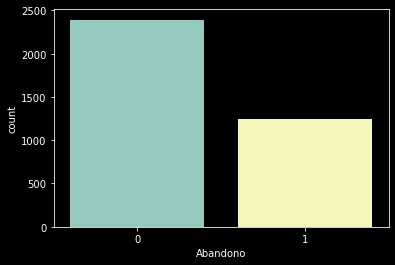

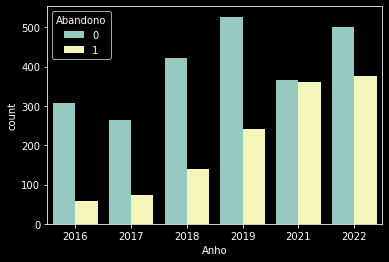

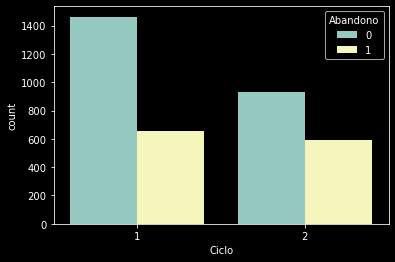

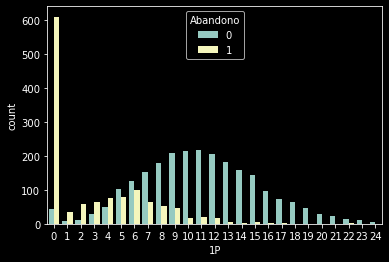

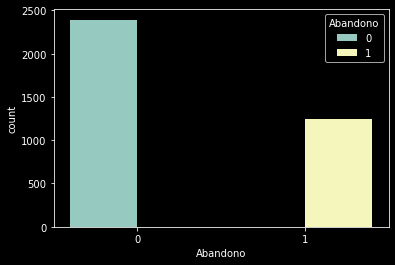

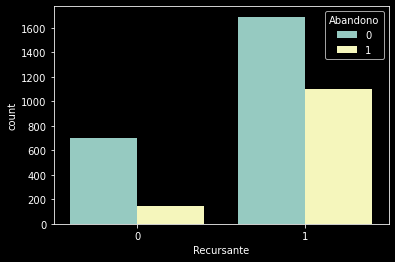

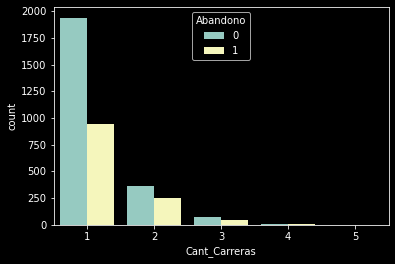

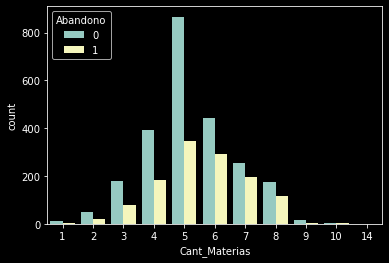

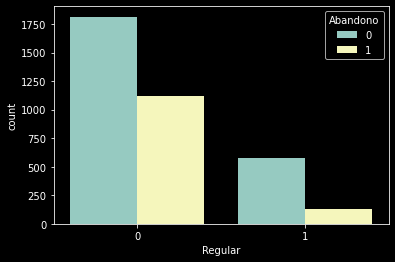

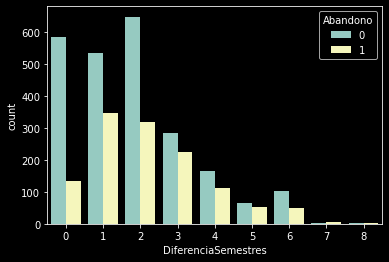

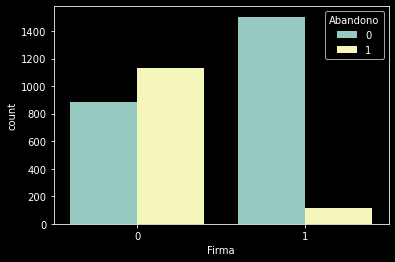

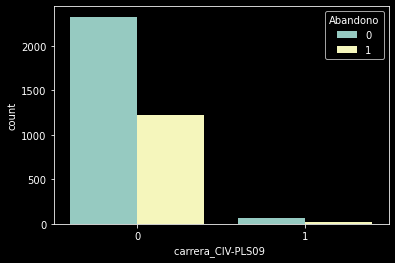

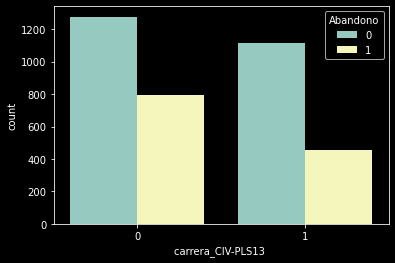

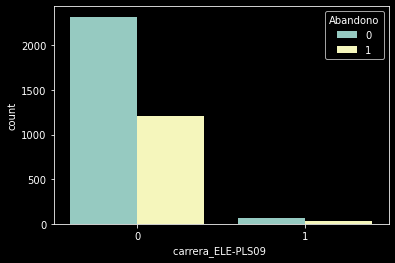

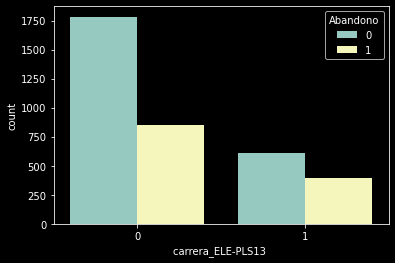

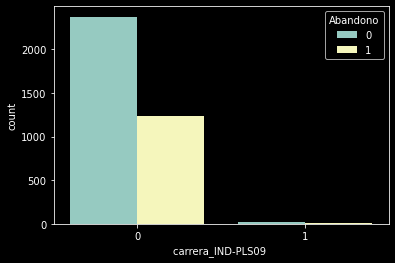

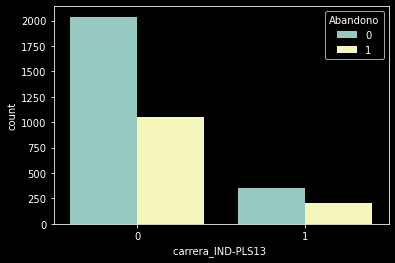

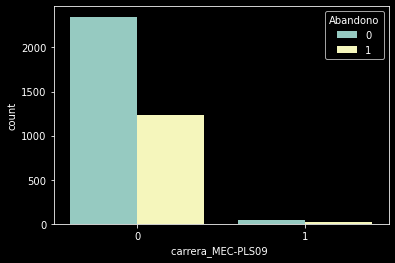

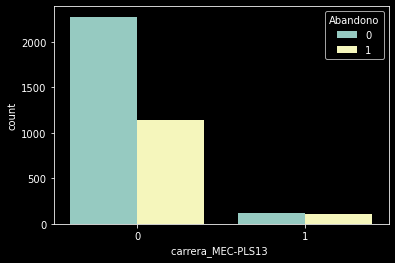

In [56]:
print(database.columns)
sns.countplot(x = 'Abandono',data=database)
plt.show()
for feature in database.columns:
    sns.countplot(x = feature, data=database,hue='Abandono')
    plt.show()

In [57]:
X = database.drop('Abandono',axis=1).values
y = database['Abandono'].values
print(X.shape)
print(y.shape)

(3640, 17)
(3640,)


Importancia de cada feature

In [58]:
dt = DecisionTreeClassifier(random_state=10, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=10)

In [59]:
fi_col = []
fi = []
for i,column in enumerate(database.drop('Abandono',axis=1)):
    print('Feature importance {}: {}'.format(column, dt.feature_importances_[i]))
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

Feature importance Anho: 0.05435188694447093
Feature importance Ciclo: 0.015007539856996693
Feature importance 1P: 0.5839705719200131
Feature importance Recursante: 0.015809457062517712
Feature importance Cant_Carreras: 0.029979179557678814
Feature importance Cant_Materias: 0.07287132993586308
Feature importance Regular: 0.005694269743357329
Feature importance DiferenciaSemestres: 0.05612062305786343
Feature importance Firma: 0.12266275844550101
Feature importance carrera_CIV-PLS09 : 0.000897744876683286
Feature importance carrera_CIV-PLS13 : 0.013754626936283522
Feature importance carrera_ELE-PLS09 : 0.005903648930804546
Feature importance carrera_ELE-PLS13 : 0.012563107010952512
Feature importance carrera_IND-PLS09 : 0.0
Feature importance carrera_IND-PLS13 : 0.0066108893121246326
Feature importance carrera_MEC-PLS09 : 0.0011123226706533304
Feature importance carrera_MEC-PLS13 : 0.0026900437382358527


In [60]:
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()
print(fi_df)
database.drop('carrera_IND-PLS09 ' ,axis=1,inplace=True)

    index              Feature  Feature Importance
0       2                   1P            0.583971
1       8                Firma            0.122663
2       5        Cant_Materias            0.072871
3       7  DiferenciaSemestres            0.056121
4       0                 Anho            0.054352
5       4        Cant_Carreras            0.029979
6       3           Recursante            0.015809
7       1                Ciclo            0.015008
8      10   carrera_CIV-PLS13             0.013755
9      12   carrera_ELE-PLS13             0.012563
10     14   carrera_IND-PLS13             0.006611
11     11   carrera_ELE-PLS09             0.005904
12      6              Regular            0.005694
13     16   carrera_MEC-PLS13             0.002690
14     15   carrera_MEC-PLS09             0.001112
15      9   carrera_CIV-PLS09             0.000898
16     13   carrera_IND-PLS09             0.000000


Creacion de modelos

In [61]:
logRegression = LogisticRegression(solver='lbfgs',max_iter=100,C=1.0)

X_model1 = database.drop('Abandono',axis=1).values #modelo con los siguientes features ['Anho', 'Ciclo', '1P', 'Abandono', 'Recursante', 'Cant_Carreras','Cant_Materias', 'Regular', 'DiferenciaSemestres', 'Firma','carrera_CIV-PLS09 ', 'carrera_CIV-PLS13 ', 'carrera_ELE-PLS09 ','carrera_ELE-PLS13 ', 'carrera_IND-PLS13 ','carrera_MEC-PLS09 ', 'carrera_MEC-PLS13 ']
X_model2 = database.drop(columns=['Abandono','1P']).values # segundo modelo en el que no se tiene en cuenta el puntaje del primer parcial
y = database['Abandono'].values
models = [X_model1, X_model2]

print(X_model1.shape)
print(X_model2.shape)
print(y.shape)

(3640, 16)
(3640, 15)
(3640,)


Score: 0.8516483516483516 

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2022
           1       0.80      0.79      0.79      1072

    accuracy                           0.86      3094
   macro avg       0.84      0.84      0.84      3094
weighted avg       0.86      0.86      0.86      3094



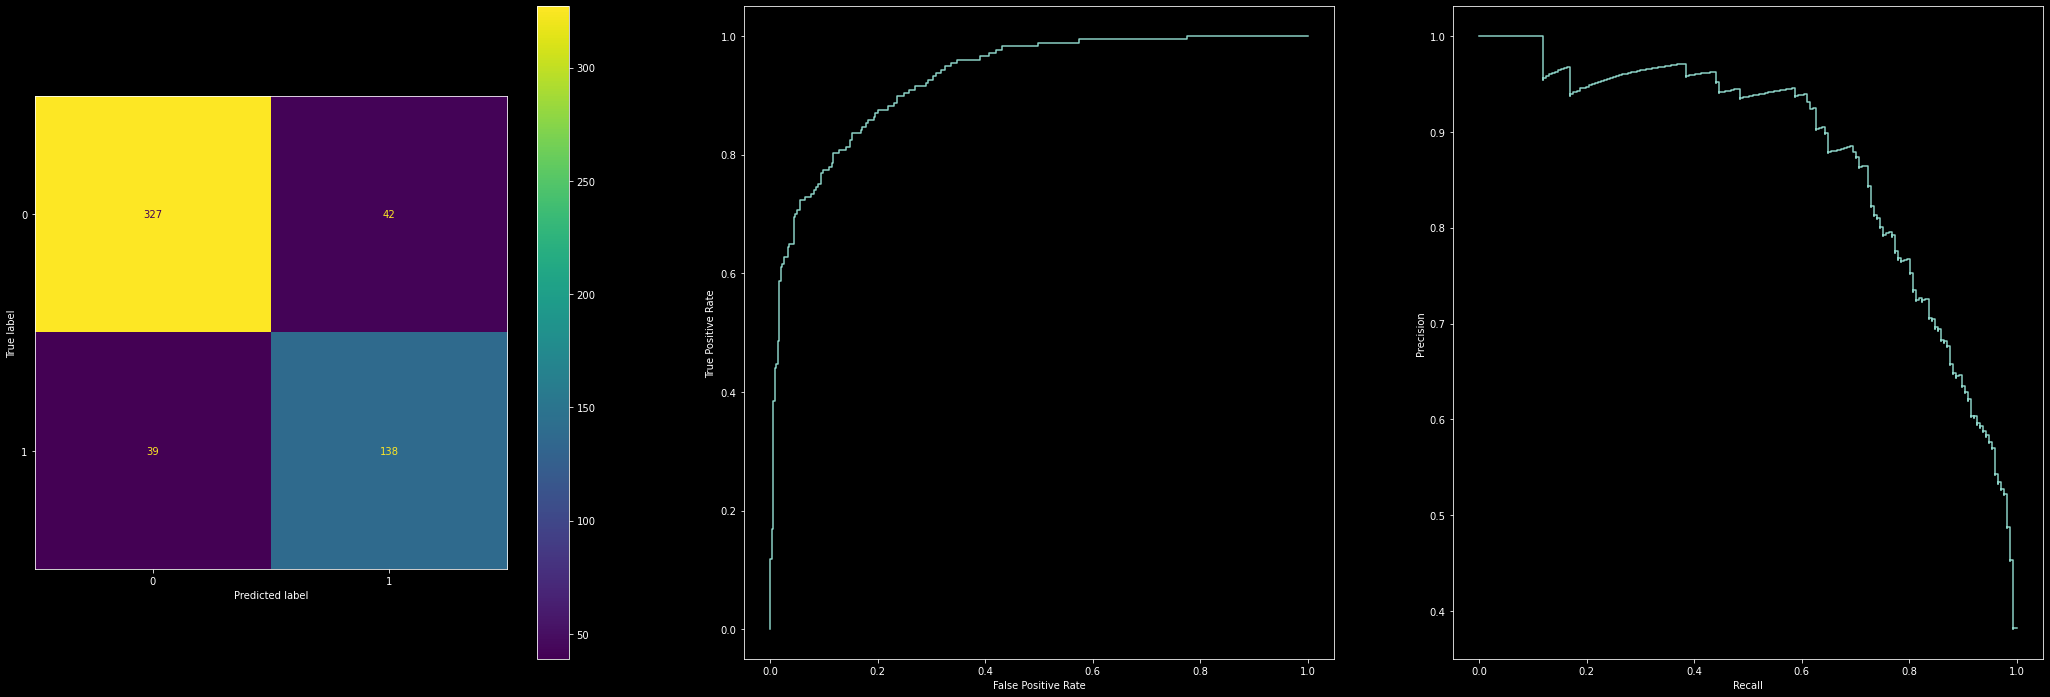

Score: 0.7545787545787546 

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2022
           1       0.60      0.73      0.66      1072

    accuracy                           0.74      3094
   macro avg       0.72      0.74      0.72      3094
weighted avg       0.76      0.74      0.74      3094



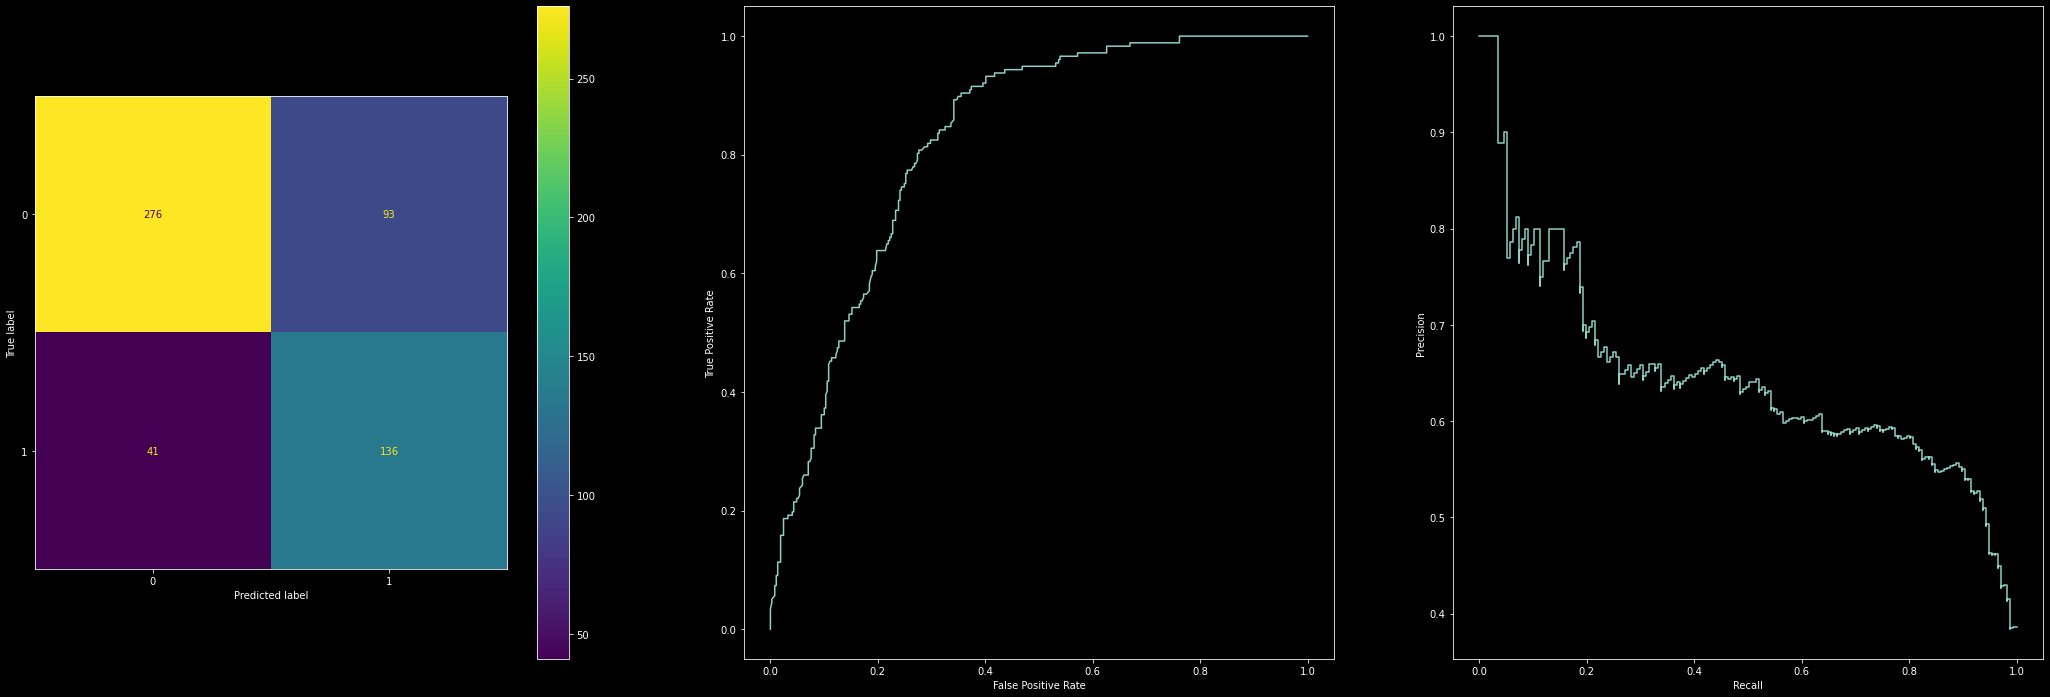

In [62]:
for X_model in models:
    X_train,X_test,y_train,y_test = train_test_split(X_model,y,train_size=0.85,test_size=0.15,random_state=10)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    
    logRegression.fit(X_train,y_train)
    
    y_pred = logRegression.predict(X_test)
    
    print("Score: {} \n".format(logRegression.score(X_test, y_test)))
    print(classification_report(y_train, logRegression.predict(X_train)))
    
    cm = confusion_matrix(y_test, y_pred)
    y_score = logRegression.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    prec, recall, _ = precision_recall_curve(y_test, y_score)
    
    cm_display = ConfusionMatrixDisplay(cm)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(36, 12))
    cm_display.plot(ax=ax1)
    roc_display.plot(ax=ax2)
    pr_display.plot(ax=ax3)
    plt.show()

Optimizacion de hiperparametro C

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X_model1,y,train_size=0.85,test_size=0.15,random_state=10)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

C_list = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_list:
    logReg = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    logReg.fit(X_train, y_train)
    score = logReg.score(X_test, y_test)
    CA.append(score)
    y_pred_t= logReg.predict_proba(X_test)
    Logarithmic_Loss.append(log_loss(y_test, y_pred_t))



In [64]:
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss = np.array(Logarithmic_Loss).reshape(20,)
outcomes = zip(C_list, CA2, Logarithmic_Loss)
df = pd.DataFrame(outcomes, columns = ["C_list", 'CA2','Logarithmic_Loss'])
df.sort_values(by='Logarithmic_Loss',ascending=True,inplace=True)
df

,C_list,CA2,Logarithmic_Loss
8,0.162378,0.855311,0.315905
9,0.545559,0.853480,0.315912
10,1.832981,0.853480,0.315989
11,6.158482,0.855311,0.316029
12,20.691381,0.855311,0.316044
13,69.519280,0.855311,0.316048
14,233.572147,0.855311,0.316050
15,784.759970,0.855311,0.316050
16,2636.650899,0.855311,0.316050
17,8858.667904,0.855311,0.316050


Modelo Final

In [65]:
logRegFinal = LogisticRegression(random_state=10, solver = 'lbfgs', C=0.162378)
logRegFinal.fit(X_train, y_train)
score = logRegFinal.score(X_test, y_test)

pred_proba_t = logRegFinal.predict_proba(X_test)
log_loss_final = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss_final)

Testing Acc: 0.8553113553113553
Log Loss: 0.3159047034515612
